In [96]:
import pandas as pd
import numpy as np

from  sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
import os
import glob

folder_path=r'C:\Users\ASUS\Desktop\system\New Daily Practice\project\Naive Bayes\movie_reviews\\'

In [62]:
positive_rew=folder_path + 'pos'
pos_text_file= glob.glob(f"{positive_rew}\\*.txt")
# pos_text_file

In [63]:
nrgative_rew=folder_path + 'neg'
neg_text_file= glob.glob(f"{nrgative_rew}\\*.txt")
# neg_text_file

In [80]:
import re
review_list=[]

for  file_name in pos_text_file:
    f= open (file_name)
    text= f.read()
    text=re.sub('[^A-Za-z]+'," ", text)
    f.close()
    review_list.append(text)
for  file_name in neg_text_file:
    f= open (file_name)
    text= f.read()
    text=re.sub('[^A-Za-z]+'," ", text)
    f.close()
    review_list.append(text) 

In [81]:
review_list[0]

'films adapted from comic books have had plenty of success whether they re about superheroes batman superman spawn or geared toward kids casper or the arthouse crowd ghost world but there s never really been a comic book like from hell before for starters it was created by alan moore and eddie campbell who brought the medium to a whole new level in the mid s with a part series called the watchmen to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd the book or graphic novel if you will is over pages long and includes nearly more that consist of nothing but footnotes in other words don t dismiss this film because of its source if you can get past the whole comic book thing you might find another stumbling block in from hell s directors albert and allen hughes getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in well anything but riddle me this who bett

In [79]:
len(pos_text_file)

1000

In [82]:
len(review_list)

2000

In [83]:
pos_target=np.ones(len(pos_text_file), dtype=int)
neg_target=np.zeros(len(neg_text_file), dtype=int)


In [84]:
y=np.append(pos_target, neg_target)
y.shape

(2000,)

# bag of words > Count vectoriser

In [90]:
count_vect=CountVectorizer(stop_words='english', min_df=0.05)
x_count_vect=count_vect.fit_transform(review_list)
# x_count_vect
x_count_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [91]:
x = pd.DataFrame(x_count_vect.toarray(), columns=count_vect.get_feature_names_out())
x

,ability,able,absolutely,act,acting,action,actor,actors,actress,actual,...,writers,writing,written,wrong,wrote,year,years,yes,york,young
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,0,0,0,5,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
1996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1997,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [92]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20,stratify=y, random_state=42)

## GaussianNB

In [94]:
gnb=GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [98]:
## Training Data Evaluation 
y_pred = gnb.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix=\n{cnf_matrix}")

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

clf_report = classification_report(y_train,y_pred)
print(f"classification Report = \n {clf_report}")

Confusion Matrix=
[[706  94]
 [233 567]]
Accuracy Score = 0.795625
classification Report = 
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       800
           1       0.86      0.71      0.78       800

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.79      1600
weighted avg       0.80      0.80      0.79      1600



In [97]:
## Test Data Evaluation 
y_pred = gnb.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix=\n{cnf_matrix}")

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

clf_report = classification_report(y_test,y_pred)
print(f"classification Report = \n {clf_report}")

Confusion Matrix=
[[167  33]
 [ 69 131]]
Accuracy Score = 0.745
classification Report = 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       200
           1       0.80      0.66      0.72       200

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400



## multinominalNB

In [99]:
mnb=MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [100]:
## Training Data Evaluation 
y_pred = mnb.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix=\n{cnf_matrix}")

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

clf_report = classification_report(y_train,y_pred)
print(f"classification Report = \n {clf_report}")

Confusion Matrix=
[[677 123]
 [125 675]]
Accuracy Score = 0.845
classification Report = 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       800
           1       0.85      0.84      0.84       800

    accuracy                           0.84      1600
   macro avg       0.85      0.84      0.84      1600
weighted avg       0.85      0.84      0.84      1600



In [101]:
## Test Data Evaluation 
y_pred = mnb.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix=\n{cnf_matrix}")

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

clf_report = classification_report(y_test,y_pred)
print(f"classification Report = \n {clf_report}")

Confusion Matrix=
[[163  37]
 [ 42 158]]
Accuracy Score = 0.8025
classification Report = 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       200
           1       0.81      0.79      0.80       200

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



## BernoulliNB

In [103]:
bnb=BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [104]:
## Training Data Evaluation 
y_pred = bnb.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix=\n{cnf_matrix}")

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

clf_report = classification_report(y_train,y_pred)
print(f"classification Report = \n {clf_report}")

Confusion Matrix=
[[704  96]
 [165 635]]
Accuracy Score = 0.836875
classification Report = 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       800
           1       0.87      0.79      0.83       800

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



In [105]:
## Test Data Evaluation 
y_pred = bnb.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix=\n{cnf_matrix}")

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

clf_report = classification_report(y_test,y_pred)
print(f"classification Report = \n {clf_report}")

Confusion Matrix=
[[165  35]
 [ 46 154]]
Accuracy Score = 0.7975
classification Report = 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       200
           1       0.81      0.77      0.79       200

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



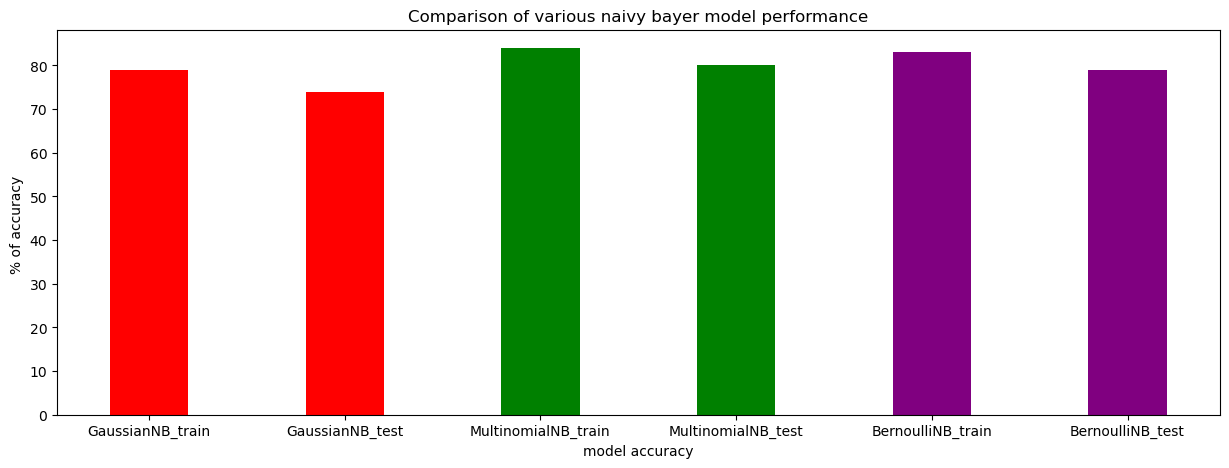

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
left_coordinates = [70, 75, 80, 85, 90, 95]
heights = [79, 74, 84, 80, 83, 79]
bar_labels = ['GaussianNB_train', 'GaussianNB_test', 'MultinomialNB_train', 'MultinomialNB_test', 'BernoulliNB_train', 'BernoulliNB_test']

plt.bar(left_coordinates, heights, tick_label=bar_labels, width=2, color=['red', 'red', 'green', 'green', 'purple', 'purple'])
plt.xlabel('model accuracy')
plt.ylabel('% of accuracy ')
plt.title("Comparison of various naivy bayer model performance")
plt.show()
